## Understanding transformers by making them more transparent

**September 10,2023 update** 

Ecco downloads an older versino of scikitlearn which has issues when building the wheel.

The alternative to visualizing the outputs of a transformer is to go to section *Transformer visualization via dictionary learning*
of *Chapter 14, Interpreting Black Box Transformer Models* and to run the online [Transformer Visualization tool](https://transformervis.github.io/transformervis/)

The original notebook reference:
Copyright https://www.eccox.io/

The educational adaptation of the Ecco notebook:
Copyright 2022, Denis Rothman, MIT license.

This notebook is for open source educational purposes only.

 

In [ ]:
# Installing Ecco
try:
  import ecco
except:
  !pip install ecco
  import warnings
  warnings.filterwarnings('ignore')

In [ ]:
import ecco
# a) Loading a pre-trained language model. 
# b) Setting 'activations' to True tells Ecco to capture neuron activations.
# c) distillgpt is a distilled GPT2 model. 
lm = ecco.from_pretrained('distilgpt2', activations=True)

# Step 1A: Completing a sentence

The goal of completing a sentence is to target a limited output to analyze it.

`The sun rises in the ____`<br>



In [ ]:
text = "The sun rises in the"

## Step 1B: Generating a token

We now ask GPT to generate ONE token and ONE token only to zoom in its "thinking" process.


In [ ]:
# Generate one token
output_1 = lm.generate(text, generate=1, do_sample=False)

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

**Take a minute to think about this**:  GPT-2 made a prediction based on the probability that the token was the best one. This is stochastic algorithm. Can we see the other candidates and their rankings? Yes. We can!

## Step 1C: Finding the other candidates

We have 3 parameters to provide:

1.   The **position** of the word in the sequence.The words are numbered from 0 to 5
2.   The **layer** of the model. There are 5 layers in the model. We want to peek into the output of the last layer to get the best output.
3.   The top output tokens, **topk=10** so that we can see the other 9 candidates.



In [ ]:
output_1.layer_predictions(position=5, layer=5, topk=10)

<IPython.core.display.Javascript object>

We can see that the #1 candidate in this case was "sky" but that other candicates were possible. GPT chose "sky" because of it's frequency in the training corpus.

# Step 2A: Exploring World Knowledge

What does GPT know about the world around it?
Does the model "know" where Opera Garnier(Paris) is located? To probe the model, we let's try the input sentence: 

`The Opera Garnier is located in ____`

We set **generate=5** to let GPT generate a meaningful output.

In [ ]:
text = "The Opera Garnier is located in"
output_2 = lm.generate(text, generate=5, do_sample=False)

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Step 2B: Finding the other candidates

When a transformer reaches the final output layer, there is more than one possible candidate. 



Note:The model is stochastic. You might obtain different results from one run to another. Look at the postion above the word you want to explore.

The goal is to see the other candidates and their rankings.

**position=11** is the position of "Paris" in the sequence generated in Step2A. <br>

**layer=5** because it is the last layer.<br>

**topk=30** so that we can see the top 30 possibilities(tokens) and their probablity (under the token).


In [ ]:
output_2.layer_predictions(position=11, layer=5, topk=30)

<IPython.core.display.Javascript object>

Notice how many other cities and tokens were candidates! 

## Step 2C: Seeing how the tokens made their way through the layers

Stochastic models could easily choose another candidate.

Let's see how the output tokens found their way through the layers.



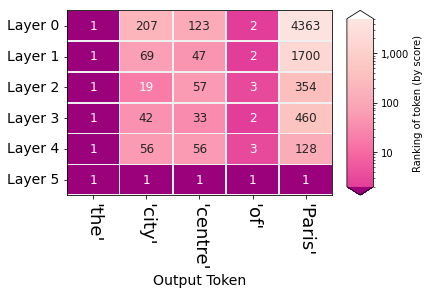

In [ ]:
output_2.rankings()

Note the following points:


1.   The layers go from 0 to 5 (from top to bottom)
2.   A simple article such as "the" quickly reaches rank 1. It is easy to find. The simple word "of" makes it rather quickly to the top.
3.   However, Notice that "city" and the other words only reached the correct values at layer 5. 





